<a href="https://colab.research.google.com/github/knstntn-ts/ColorExtractor/blob/main/ColorExtractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easydev                 #version 0.12.0
!pip install colormap                #version 1.0.4
!pip install opencv-python           #version 4.5.5.64
!pip install colorgram.py            #version 1.2.0
!pip install extcolors               #version 1.0.0


## Description

Upload an image. The program should read it and output 10 most common colors on that image. Something like this http://www.coolphptools.com/color_extract#demo.



## Import Statements

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import cv2
import extcolors

from colormap import rgb2hex

## Reading the image
We will resize the image in case of the very large input file. We choose 900px in width as our new image.

In [ ]:
img = Image.open('sample.jpg')
output_width = 900                   #set the output size
wpercent = (output_width/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((output_width,hsize), Image.ANTIALIAS) # this variable will be used throughout

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  """


Next is extracting the colors. 'tolerance' is how many groups the colors will be separated into. 'limit' is the maximum colors to be extracted. (Note: it takes a while, so be patient).

In [ ]:
colors_x = extcolors.extract_from_image(img, tolerance = 10, limit = 11)
colors_x

([((93, 98, 58), 123209),
  ((244, 157, 0), 81297),
  ((229, 127, 0), 44987),
  ((69, 75, 31), 31921),
  ((250, 181, 0), 26034),
  ((251, 223, 0), 25156),
  ((253, 207, 0), 24339),
  ((173, 21, 19), 22579),
  ((149, 16, 22), 13023),
  ((193, 70, 0), 11851),
  ((187, 92, 0), 11347)],
 607500)

Let us create a function for converting the colors_x (which are in RGB) to HEX code.

In [ ]:
def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                          int(i.split(", ")[1]),
                          int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df

df_color = color_to_df(colors_x)

Display the hex codes.

In [ ]:
df_color

,c_code,occurence
0,#5D623A,123209
1,#F49D00,81297
2,#E57F00,44987
3,#454B1F,31921
4,#FAB500,26034
5,#FBDF00,25156
6,#FDCF00,24339
7,#AD1513,22579
8,#951016,13023
9,#C14600,11851


Plot on a pie-chart.

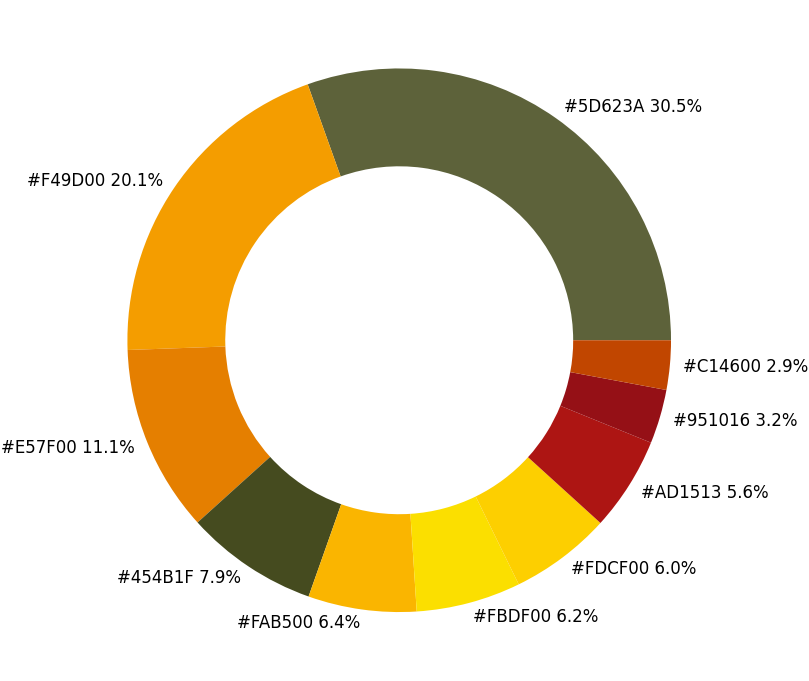

In [ ]:
list_color = list(df_color['c_code'])
list_precent = [int(i) for i in list(df_color['occurence'])]
text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color,
                                                                               list_precent)]
fig, ax = plt.subplots(figsize=(90,90),dpi=10)
wedges, text = ax.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 120, 'color':'black'}
                     )
plt.setp(wedges, width=0.3)

#create space in the center
plt.setp(wedges, width=0.36)

ax.set_aspect("equal")
fig.set_facecolor('white')
plt.show()